In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#load road network & physical features
data_dir = 'D:/Thesis/dataset/Road/'
road_net = pd.read_csv(data_dir + 'Roadnetwork.txt',delimiter='\s+', header=None, index_col=False) 
road_ftrs = pd.read_csv(data_dir + 'Roadfeature.txt',delimiter='\s+', header=None, index_col=False) 
# convert DF to np.array
net_rows = road_net.values

In [10]:
# road_ftr = road_ftrs.loc[:,0:7]
road_ftrs.columns =['road_id','length','lanes','max_speed','dir','level','tor','n_connnections','school','ofc', 'bnk', 'mall', 'rest', 'gas_st', 'spot', 'hotel', 'trans', 'living_ser', 'sum_poi']

In [11]:
road_ftrs.head(10)
# road_net

,road_id,length,lanes,max_speed,dir,level,tor,n_connnections,school,ofc,bnk,mall,rest,gas_st,spot,hotel,trans,living_ser,sum_poi
0,0,261.877396,2,5.555556,1,3,1.002687,4,0,0,0,4,2,0,0,0,0,2,8
1,1,178.270215,1,5.555556,1,3,1.000207,2,1,2,0,3,0,0,0,0,2,3,11
2,2,6.053683,3,19.444444,0,2,1.000000,4,0,0,0,0,0,0,0,0,0,2,2
3,3,8.725633,4,19.444444,0,2,1.000001,6,0,0,0,0,0,0,0,0,0,2,2
4,4,442.084671,3,19.444444,0,2,1.000091,6,0,4,0,0,0,0,0,0,0,1,5
5,5,212.454198,1,5.555556,1,9,1.000289,4,0,0,0,0,0,0,0,0,0,0,0
6,6,167.628508,2,5.555556,1,3,1.018134,6,1,0,0,2,0,3,0,0,0,3,9
7,7,388.765882,2,11.111111,0,2,1.000000,6,0,0,0,2,0,3,0,0,0,1,6
8,8,386.205570,2,11.111111,0,2,1.000000,2,0,0,0,2,0,3,0,0,0,1,6
9,9,189.567856,2,19.444444,0,6,1.000050,6,0,0,1,0,1,2,0,1,0,2,7


In [15]:
level1_ftrs = road_ftrs[road_ftrs['level']<= 1]
level2_ftrs = road_ftrs[road_ftrs['level']== 2]
level3_ftrs = road_ftrs[road_ftrs['level']>= 3]

In [16]:
level1_ftrs.columns

Index(['road_id', 'length', 'lanes', 'max_speed', 'dir', 'level', 'tor',
       'n_connnections', 'school', 'ofc', 'bnk', 'mall', 'rest', 'gas_st',
       'spot', 'hotel', 'trans', 'living_ser', 'sum_poi'],
      dtype='object')

In [ ]:
#df[0] select 1st column
#df.loc[0] select 1st row
# road_ftrs.loc[0][1]

#load road history speed data 
file_path = 'hist_speed_array.txt'
data = pd.read_csv(file_path, sep='\s+',header=None)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,81583,81584,81585,81586,81587,81588,81589,81590,81591,81592
0,NaN,NaN,8.828940,5.092275,8.894114,NaN,0.472230,9.177182,4.421228,NaN,...,2.754259,13.168823,NaN,4.783225,8.715493,7.183343,15.168612,14.055518,12.654190,13.842023
1,2.536792,NaN,NaN,5.011661,9.979667,4.645066,1.664250,7.447552,3.977937,9.677457,...,0.798043,12.502764,13.069864,5.470120,4.066974,NaN,14.992654,14.489677,14.311808,13.747519
2,NaN,4.312880,NaN,3.010578,10.548084,1.681952,3.903447,7.856210,7.596288,11.476380,...,1.311338,13.870441,13.410543,6.293779,5.914057,NaN,13.336924,15.405235,10.239477,9.822859
3,NaN,3.943209,6.681925,NaN,7.512403,NaN,1.182314,6.694858,3.759230,13.152567,...,2.158810,15.321982,14.166958,5.166970,7.591885,5.293462,13.436750,15.844602,10.105091,12.518583
4,2.862901,NaN,7.266834,NaN,10.212902,1.052743,2.372027,6.817552,4.818343,15.157232,...,NaN,14.327966,17.726496,6.948707,5.557213,NaN,15.410073,14.237376,13.111311,13.106872
5,1.561155,NaN,NaN,4.867362,10.375331,1.450325,2.519006,6.530164,6.069100,5.651490,...,NaN,15.458158,NaN,6.890530,NaN,NaN,14.858754,14.792133,14.691097,11.873595
6,NaN,NaN,NaN,6.871308,6.368112,1.283134,2.678873,8.043868,5.984177,10.949668,...,NaN,14.348099,11.963041,5.303618,NaN,NaN,16.725783,16.277966,11.500251,13.497455
7,3.600045,NaN,3.956144,NaN,10.480971,2.089516,1.233729,7.453059,5.302714,NaN,...,0.268874,NaN,14.480610,NaN,NaN,NaN,14.816401,13.890175,11.468229,13.941761
8,NaN,NaN,12.157415,7.816200,7.144310,3.005020,0.666771,5.643796,4.997520,9.096303,...,0.829944,16.512408,14.562341,NaN,NaN,NaN,14.111974,16.174518,10.370099,10.916328
9,NaN,NaN,NaN,6.054139,14.168908,1.881975,NaN,6.467253,8.343192,NaN,...,NaN,12.952550,12.737253,6.218149,5.250948,NaN,13.880555,13.300268,15.274946,11.259759


In [ ]:
#summerize null count
# print("***Count NaN in each column of a DataFrame***")
# print("Nan in each columns" , data.isnull().sum(), sep='\n')
    
print("***Count NaN in each row of a DataFrame***")    
for i in range(len(data.index)) :
    print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())


***Count NaN in each row of a DataFrame***
Nan in row  0  :  14906
Nan in row  1  :  14436
Nan in row  2  :  14336
Nan in row  3  :  14025
Nan in row  4  :  13731
Nan in row  5  :  13386
Nan in row  6  :  13265
Nan in row  7  :  13219
Nan in row  8  :  13345
Nan in row  9  :  13390
Nan in row  10  :  13473
Nan in row  11  :  13304
Nan in row  12  :  13138
Nan in row  13  :  13335
Nan in row  14  :  13313
Nan in row  15  :  13061
Nan in row  16  :  13226
Nan in row  17  :  13209
Nan in row  18  :  13192
Nan in row  19  :  13307
Nan in row  20  :  13183
Nan in row  21  :  13498
Nan in row  22  :  13727
Nan in row  23  :  13822


In [ ]:
data[1990]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 1990, dtype: float64

In [ ]:
new_data = data.values
count_row = data.shape[0]  # gives number of row count
count_col = data.shape[1]  # gives number of col count
print(data.shape)

(24, 81593)


In [ ]:
# print(new_data[0][1], data.loc[0][1] )

nan nan


In [ ]:
#create a directed graph
G = nx.DiGraph()
# Add edges and edge attributes
for idx in range(len(net_rows)):
    G.add_edge(net_rows[idx][1], net_rows[idx][2], edge_id = net_rows[idx][0])
    if road_ftr.loc[idx]['dir'].values[0] > 0: #for bi-dirrection connection
      G.add_edge(net_rows[idx][2], net_rows[idx][1], edge_id = net_rows[idx][0])

undir_G = G.to_undirected()

In [ ]:
# find knbrs(G, start=4, k=3))
def darw_net(node_id, k=1):
    nb = nx.single_source_shortest_path_length(G.to_undirected(), node_id, cutoff=k)
    sub_G =G.subgraph(list(nb.keys()))

    # edge_level
    edge_level=dict()
    for x,y,dic in sub_G.edges(data=True):
    #     print(x,y,dic['edge_id'])
        edge_level[(x,y)]= dic['edge_id']


    plt.figure(figsize=(6, 5))
    # graphviz_layout
    nx.draw(sub_G, with_labels=True, node_size=1500, node_color="skyblue",pos=nx.drawing.nx_agraph.graphviz_layout(sub_G))# pos= nx.spring_layout(sub_G) #pos=nx.drawing.nx_agraph.graphviz_layout(G)
    # edge_labels = nx.get_edge_attributes(sub_G,'edge_id')
    nx.draw_networkx_edge_labels(G, pos=nx.drawing.nx_agraph.graphviz_layout(sub_G), edge_labels = edge_level)
    plt.title("Road-Network, src:"+str(node_id)+', cutoff:'+ str(k))
    plt.show()

In [ ]:
def t_series(t_id,e_id ):
    '''list 2-step speed data in time series'''
    v = []
    if 0<= t_id -2:
        v.append(data.loc[t_id -2][e_id])
    if 0<= t_id -1:
        v.append(data.loc[t_id -1][e_id])
        
    if t_id +1 <24:
        v.append(data.loc[t_id +1][e_id])
    if t_id +2 <24:
        v.append(data.loc[t_id +2][e_id])
    return v


# def get_nb(edge_id,time_id, k=2): #k cutoff value
#     src, dst = net_rows[edge_id][1], net_rows[edge_id][2]
# #     print(edge_id,src, dst)
# #     H = G.subgraph([src, dst])
# #     print(list(H.edges))
#     nbr_spd =[]
    
#     pre_nodes = G.predecessors(src)
#     su_nodes = G.successors(dst)

# #     print('->:pre:',list(pre_nodes),'successor:',list(su_nodes))
    
#     nb = nx.single_source_shortest_path_length(G.to_undirected(), src, cutoff=k) # update use edge
#     sub_G =G.to_undirected().subgraph(list(nb.keys()))
#     for e in sub_G.edges(data=True):
#         e_id =e[2]['edge_id']
# #         print(e, int(road_ftr.loc[e_id]['lev']))
# #         print(e_id,'v:',data.loc[time_id][e_id])
#         nbr_spd.append(data.loc[time_id][e_id])
#         if e_id == edge_id:
# #             print('T_val:',t_series(time_id,e_id ))
#             t_spd = list(t_series(time_id,e_id))
# #     darw_net(src, k) #call draw function
#     return (nbr_spd,t_spd)

In [ ]:
def get_nbr_speed(edge_id,time_id, k=2): #k cutoff value
    src, dst = net_rows[edge_id][1], net_rows[edge_id][2]
#     nbr_spd =[]
    nbrs = set([src])
    temp = set()
    ed_set = set()#[edge_id]
    darw_net(src, k) #call draw function

    for lv in range(k):
        for n in nbrs:
            for nbr in undir_G[n]:
                temp.add(nbr)
                ed_id = undir_G[n][nbr]['edge_id']
                
                if ed_id not in ed_set:
                    ed_set.add(ed_id)
                    
#                     print(ed_id, time_id, data.loc[time_id][e_id]);
#                     nbr_spd.append(data.loc[time_id][e_id]);
                    
        nbrs = set(temp)

#     print(ed_set)
    ed_set.remove(edge_id)
    return ed_set


0 Null value count: 14906


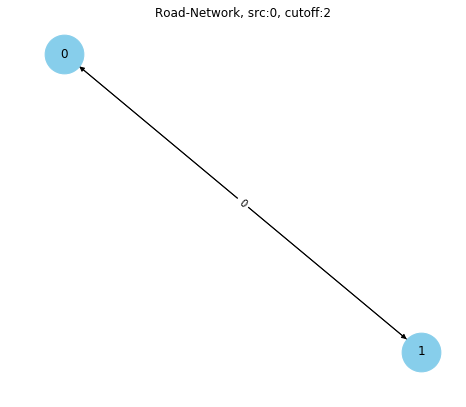

T: 0 E_id: 0 [] [2.536792, nan] --> 2.536792


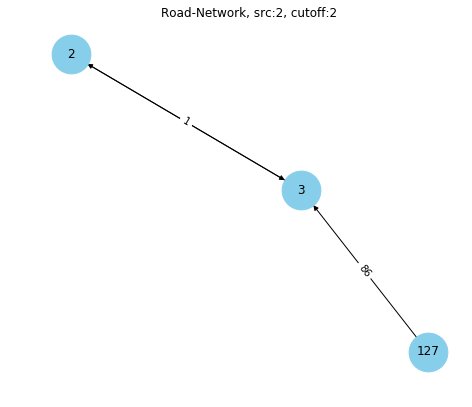

T: 0 E_id: 1 [5.893966000000001] [nan, 4.312880000000001] --> 5.103423000000001


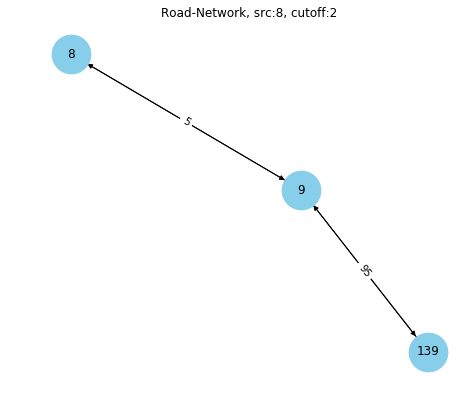

T: 0 E_id: 5 [nan] [4.645066, 1.681952] --> 3.163509


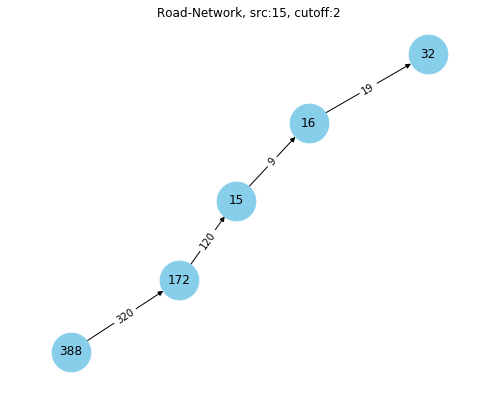

T: 0 E_id: 9 [nan, 10.099694, nan] [9.677457, 11.47638] --> 10.417843666666668


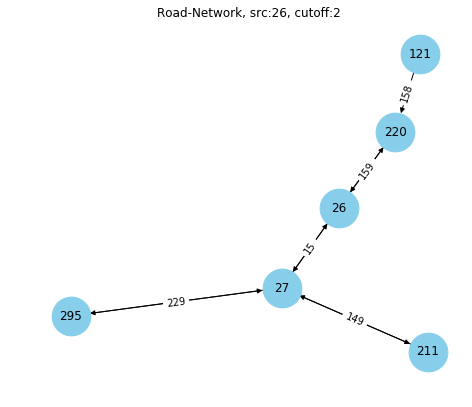

T: 0 E_id: 15 [8.601725999999998, 6.172273000000001, 7.030546000000001, nan] [nan, 6.721103] --> 7.131411999999999


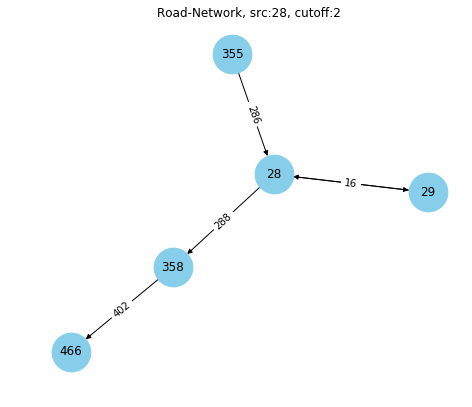

T: 0 E_id: 16 [6.009028, 8.437186999999998, 3.990589] [5.049635, nan] --> 5.871609749999999


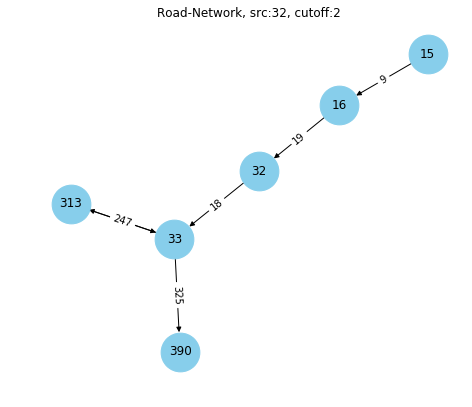

T: 0 E_id: 18 [6.239128, 10.417843666666668, 10.099694, 5.204545] [nan, 5.319593] --> 7.456160733333332


In [ ]:
# missing value cal
# new_data = pd.DataFrame(data)

for time_id in range(1):
    nan_pos = data.loc[time_id].isnull()
    print(time_id,'Null value count:',data.loc[time_id].isnull().sum())
    
    for e_id in range(20): # number of road seg./count_col
#         print(e_id ,nan_pos[e_id])
        if nan_pos[e_id] == True:
            nbr_spd =[]
            nbr_edges = get_nbr_speed(e_id,time_id,k=2)
            for nbr_ed in nbr_edges:
                nbr_spd.append(data.loc[time_id][nbr_ed])
            time_spd = t_series(time_id,e_id)
#             print(e_id, nbr_edges,nbr_spd, time_spd)
            print( 'T:',time_id,'E_id:',e_id,nbr_spd,time_spd,'-->',np.nanmean(nbr_spd+time_spd) )
            new_data[time_id][e_id] = np.nanmean(nbr_spd+time_spd)

#save data 
# np.savetxt('hist_speed_imputed_nbr.txt', new_data, delimiter=' ')

In [ ]:
print("***Count NaN in each row of a DataFrame***")    
for i in range(len(data.index)) :
    print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())

***Count NaN in each row of a DataFrame***
Nan in row  0  :  42
Nan in row  1  :  42
Nan in row  2  :  42
Nan in row  3  :  42
Nan in row  4  :  42
Nan in row  5  :  42
Nan in row  6  :  42
Nan in row  7  :  42
Nan in row  8  :  42
Nan in row  9  :  42
Nan in row  10  :  42
Nan in row  11  :  42
Nan in row  12  :  42
Nan in row  13  :  42
Nan in row  14  :  42
Nan in row  15  :  42
Nan in row  16  :  42
Nan in row  17  :  42
Nan in row  18  :  42
Nan in row  19  :  42
Nan in row  20  :  42
Nan in row  21  :  42
Nan in row  22  :  42
Nan in row  23  :  42


In [ ]:
for time_id in range(24):
    nan_pos = data.loc[time_id].isnull()
    print(time_id,'Null value count:',data.loc[time_id].isnull().sum())
    
    for e_id in range(count_col): # number of road seg./count_col
#         print(e_id ,nan_pos[e_id])
        if nan_pos[e_id] == True:
            print(time_id, e_id ,data.loc[time_id][e_id], data[e_id].values)
            # fill value as column mean value
#             data.loc[time_id][e_id] = np.nanmean(data[e_id].values)

0 Null value count: 42
0 1990 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 4347 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
0 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan n

1 81058 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81213 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81214 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81363 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81469 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81479 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81561 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
1 81562 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
2 Null value count: 42
2 1990 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan 

4 1990 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 4347 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
4 2

6 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 29107 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6 53009 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
6

8 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 29107 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 53009 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8 54280 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
8

10 Null value count: 42
10 1990 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 4347 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
10 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

11 79644 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81058 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81213 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81214 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81363 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81469 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81479 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81561 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
11 81562 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan n

13 79644 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81058 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81213 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81214 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81363 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81469 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81479 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81561 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
13 81562 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan n

15 79644 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81058 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81213 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81214 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81363 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81469 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81479 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81561 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
15 81562 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan n

18 Null value count: 42
18 1990 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 4347 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
18 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

19 81479 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
19 81561 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
19 81562 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
20 Null value count: 42
20 1990 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
20 4347 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
20 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
20 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
20 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
20 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

22 18511 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 27114 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 27595 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 28906 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 29025 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 29028 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 29059 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 29107 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
22 53009 nan [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan n

In [ ]:
# print(nx.number_weakly_connected_components(G))
# for c in nx.weakly_connected_components(G):
#     print(c)
# # >>> H = G.subgraph([0, 1, 2])
# # >>> list(H.edges)

In [ ]:
# f = open('hist_speed_imputed_nbr.txt', 'w')
# f.write( 'T:',time_id,'E_id:',e_id,spd,'-->',np.nanmean(spd[0]+spd[1]),'\n')
# f.close()
# #Nan in row
# for idx in range(len(new_data.index)) :
#     select_indices = new_data.iloc[idx].isnull()
#     col_nan = new_data.iloc[select_indices].index.tolist()
#     for col in col_nan:
#         new_data.loc[idx][col] = np.nanmean(new_data[col]) # mean of col values